# Sentiment Classification

### Imported the data 
- Used `imdb.load_data()` method


In [92]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.datasets import imdb
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = 10000)

### Pad each sentence to be of same length 
- Took maximum sequence length as 300

In [93]:
X_train = pad_sequences(X_train, maxlen = 300)
X_test = pad_sequences(X_test, maxlen=300)

### Shape of features & labels 

In [94]:
X_train.shape

(25000, 300)

In [95]:
y_train.shape

(25000,)

In [96]:
X_test.shape

(25000, 300)

In [97]:
y_test.shape

(25000,)

### Value of any one feature and it's label 

Feature value

In [98]:
X_train[3]

array([  12,   47,    6, 2683,  936,    5, 6307,    2,   19,   49,    7,
          4, 1885,    2, 1118,   25,   80,  126,  842,   10,   10,    2,
          2, 4726,   27, 4494,   11, 1550, 3633,  159,   27,  341,   29,
       2733,   19, 4185,  173,    7,   90,    2,    8,   30,   11,    4,
       1784,   86, 1117,    8, 3261,   46,   11,    2,   21,   29,    9,
       2841,   23,    4, 1010,    2,  793,    6,    2, 1386, 1830,   10,
         10,  246,   50,    9,    6, 2750, 1944,  746,   90,   29,    2,
          8,  124,    4,  882,    4,  882,  496,   27,    2, 2213,  537,
        121,  127, 1219,  130,    5,   29,  494,    8,  124,    4,  882,
        496,    4,  341,    7,   27,  846,   10,   10,   29,    9, 1906,
          8,   97,    6,  236,    2, 1311,    8,    4,    2,    7,   31,
          7,    2,   91,    2, 3987,   70,    4,  882,   30,  579,   42,
          9,   12,   32,   11,  537,   10,   10,   11,   14,   65,   44,
        537,   75,    2, 1775, 3353,    2, 1846,   

Label value

In [99]:
y_train[3]

1

In [100]:
X = np.concatenate((X_train, X_test), axis = 0)
y = np.concatenate((y_train, y_test), axis = 0)

### Decoded the feature value to get original sentence 

First, retrieve a dictionary that contains mapping of words to their index in the IMDB dataset

In [101]:
def decode_review(x, y):
  
  word_index = imdb.get_word_index()

  
  word_index = {k: (v + 3) for k, v in word_index.items()}
  word_index['<PAD>'] = 0
  word_index['<START>'] = 1
  word_index['<UNK>'] = 2  
  word_index['<UNUSED>'] = 3
  
  word_index_1= {i: w for w, i in word_index.items()}
  
  words = (' '.join(word_index_1[i] for i in x if i!=0))
  print(f'Review: {words}')
  print(f'Actual Sentiment: {y}')
  return word_index, word_index_1

word_index, word_index_1 = decode_review(X_train[0], y_train[0])

Review: <START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised

Now used the dictionary to get the original words from the encodings, for a particular sentence

Get the sentiment for the above sentence
- positive (1)
- negative (0)

In [102]:
y_train[0]

1

### Defined model 
- Defined a Sequential Model


In [103]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Embedding,TimeDistributed,Flatten
vocab_size = 10000
embedding_dim = 100 
maxlen = 300

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=maxlen))
model.add(LSTM(units=60, activation='tanh',return_sequences=True))
model.add(TimeDistributed(Dense(100)))
model.add(Flatten())
model.add(Dense(units=1, activation='sigmoid'))

### Compiled the model 
- Used Optimizer as Adam
- Used Binary Crossentropy as loss
- Used Accuracy as metrics

In [104]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

###model summary 

In [105]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 300, 100)          1000000   
_________________________________________________________________
lstm_4 (LSTM)                (None, 300, 60)           38640     
_________________________________________________________________
time_distributed_4 (TimeDist (None, 300, 100)          6100      
_________________________________________________________________
flatten_4 (Flatten)          (None, 30000)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 30001     
Total params: 1,074,741
Trainable params: 1,074,741
Non-trainable params: 0
_________________________________________________________________


### Fit the model 

In [106]:
history = model.fit(X_train, y_train, epochs=5, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/5
196/196 [==============================] - 110s 556ms/step - loss: 0.4977 - accuracy: 0.7125 - val_loss: 0.2796 - val_accuracy: 0.8828
Epoch 2/5
196/196 [==============================] - 107s 547ms/step - loss: 0.1814 - accuracy: 0.9313 - val_loss: 0.3068 - val_accuracy: 0.8762
Epoch 3/5
196/196 [==============================] - 107s 547ms/step - loss: 0.1116 - accuracy: 0.9593 - val_loss: 0.4008 - val_accuracy: 0.8666
Epoch 4/5
196/196 [==============================] - 107s 547ms/step - loss: 0.0498 - accuracy: 0.9828 - val_loss: 0.4920 - val_accuracy: 0.8599
Epoch 5/5
196/196 [==============================] - 107s 547ms/step - loss: 0.0236 - accuracy: 0.9921 - val_loss: 0.7855 - val_accuracy: 0.8564


### Evaluate model 

In [107]:
def plot_learningCurve(history, epochs):
  # Plot training & validation accuracy values
  epoch_range = range(1, epochs+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

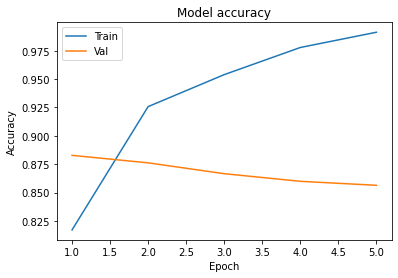

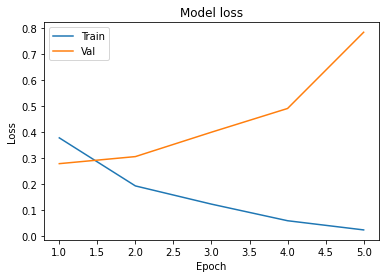

In [108]:
plot_learningCurve(history, 5)

In [109]:
from sklearn.metrics import classification_report
y_pred = model.predict_classes(X_test)
print(f'Classification Report:\n{classification_report(y_pred, y_test)}')

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.83      0.86     13353
           1       0.82      0.88      0.85     11647

    accuracy                           0.86     25000
   macro avg       0.86      0.86      0.86     25000
weighted avg       0.86      0.86      0.86     25000



### Prediction on one sample 

In [110]:
decode_review(X_test[20],y_test[20])
print(f'Predicted sentiment: {y_pred[20][0]}')

Review: <START> this film was one that i have waited to see for some time i was glad to find it has been everything anticipated the writing of this film has been so finely crafted and <UNK> far beyond what is seen by the audience i found it amusing that so many people watching will not read between some very important lines but indeed if not the movie will make sense in a different way and is very brilliant the film has many stories and characters woven together around this one character <UNK> a man whom has rose from the streets amidst many <UNK> and become a very powerful criminal after spending some time in prison <UNK> finds a <UNK> in the justice system and through a disturbing turn of events is released only to find everything is not at all what it seems <UNK> finds himself going up against the higher realm of society and political <UNK> in order to make clear how important a man's word is and stands for a war begins as the street is in arms against <UNK> of wealth and corrupt po

## Result:
> Accuracy was 86% \
> f1 score: >86% \
> Loss was 0.11